In [100]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os

In [101]:
# Get the file path from an environment variable
file_path = os.environ.get("CSV_FILE_PATH")

if file_path:
    supply_chain_data = pd.read_csv(file_path)
else:
    file_path = input("Enter the CSV file path: ")
    supply_chain_data = pd.read_csv(file_path, encoding='iso-8859-1')

Enter the CSV file path: /Users/konstantinostsoum/Downloads/supply-chain-datasets/DataCoSupplyChainDataset.csv


In [102]:
def customized_plot(title, x_label, y_label, x_rotation=None):
    """
    This function creates a customized plot with specified title, labels, and optional x-axis label rotation.

    Args:
    - title (str): The title of the plot.
    - x_label (str): The label for the x-axis.
    - y_label (str): The label for the y-axis.
    - x_rotation (int, optional): The rotation angle for x-axis labels (degrees).

    Returns:
    - fig (matplotlib.figure.Figure): The figure object for the plot.
    - ax (matplotlib.axes._subplots.AxesSubplot): The axes object for the plot.
    """
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(title, fontsize=16, fontweight='bold')
    ax.set_xlabel(x_label, fontsize=12)
    ax.set_ylabel(y_label, fontsize=12)
    if x_rotation:
        ax.tick_params(axis='x', labelrotation=x_rotation)
    return fig, ax

### Gathering information

In [103]:
# Get a first glance of the dataset
supply_chain_data.shape

(180519, 53)

In [104]:
# Columns and data types
supply_chain_data.dtypes

Type                              object
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Sales per customer               float64
Delivery Status                   object
Late_delivery_risk                 int64
Category Id                        int64
Category Name                     object
Customer City                     object
Customer Country                  object
Customer Email                    object
Customer Fname                    object
Customer Id                        int64
Customer Lname                    object
Customer Password                 object
Customer Segment                  object
Customer State                    object
Customer Street                   object
Customer Zipcode                 float64
Department Id                      int64
Department Name                   object
Latitude                         float64
Longitude                        float64
Market          

In [105]:
# Concatenate customer's Full name
supply_chain_data['Customer Full Name'] = supply_chain_data['Customer Fname'].astype(str)+supply_chain_data['Customer Lname'].astype(str)
# Remove irrelevant features
supply_chain_data=supply_chain_data.drop(['Customer Email','Product Status','Customer Password','Customer Street','Customer Fname','Customer Lname',
           'Product Description','Product Image','Order Zipcode','shipping date (DateOrders)'],axis=1)
supply_chain_data.shape

(180519, 44)

In [106]:
# Missing values check
supply_chain_data.isna().sum()

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Category Id                      0
Category Name                    0
Customer City                    0
Customer Country                 0
Customer Id                      0
Customer Segment                 0
Customer State                   0
Customer Zipcode                 3
Department Id                    0
Department Name                  0
Latitude                         0
Longitude                        0
Market                           0
Order City                       0
Order Country                    0
Order Customer Id                0
order date (DateOrders)          0
Order Id                         0
Order Item Cardprod Id           0
Order Item Discount              0
Order Item Discount Rate         0
Order Item Id       

Surprisingly, there are 3 (I guess random) missing values in the "Customer Zipcode" column. 


Since this refers to a zipcode, I'll try to search in what country, city, state these customers belong to as well as trying to find the zipcode using coordinates.  

In [107]:
# Show rows that contain missing values ("Customer Zipcode" column)
supply_chain_data[supply_chain_data['Customer Zipcode'].isna()][["Customer City", "Customer Country", "Customer Segment", "Customer State", "Latitude", "Longitude"]]

,Customer City,Customer Country,Customer Segment,Customer State,Latitude,Longitude
35704,CA,EE. UU.,Consumer,95758,39.134159,-123.718552
46440,CA,EE. UU.,Corporate,95758,38.408573,-121.449112
82511,CA,EE. UU.,Consumer,91732,34.071892,-118.013886


In [108]:
# Define the rows and values for imputation
rows_to_impute = [35704, 46440, 82511]
imputed_zipcode_values = [5801, 95758, 12014] 

# Impute values
for row_idx, value in zip(rows_to_impute, imputed_zipcode_values):
    supply_chain_data.at[row_idx, "Customer Zipcode"] = value
    
# Remove Latitude and Longitude as we do not need them anymore
supply_chain_data=supply_chain_data.drop(["Latitude", "Longitude"], axis =1)

In [109]:
# Transposed the dataframe due to the amount of columns we got
supply_chain_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Days for shipping (real),180519.0,3.497654,1.623722,0.00000,2.000000,3.000000,5.000000,6.000000
Days for shipment (scheduled),180519.0,2.931847,1.374449,0.00000,2.000000,4.000000,4.000000,4.000000
Benefit per order,180519.0,21.974989,104.433526,-4274.97998,7.000000,31.520000,64.800003,911.799988
Sales per customer,180519.0,183.107609,120.043670,7.49000,104.379997,163.990005,247.399994,1939.989990
Late_delivery_risk,180519.0,0.548291,0.497664,0.00000,0.000000,1.000000,1.000000,1.000000
Category Id,180519.0,31.851451,15.640064,2.00000,18.000000,29.000000,45.000000,76.000000
Customer Id,180519.0,6691.379495,4162.918106,1.00000,3258.500000,6457.000000,9779.000000,20757.000000
Customer Zipcode,180519.0,35921.159097,37542.522425,603.00000,725.000000,19380.000000,78207.000000,99205.000000
Department Id,180519.0,5.443460,1.629246,2.00000,4.000000,5.000000,7.000000,12.000000
Order Customer Id,180519.0,6691.379495,4162.918106,1.00000,3258.500000,6457.000000,9779.000000,20757.000000


### Exploratory Data Analysis

Since we have 42 columns, it would be amazing to visualize them all (both separately and not). 

However, we have to be strategic to avoid getting lost in the details. 

In the end, we can always create a visual later if something sparks our interest or we may tailor made the dataset for different purposes.

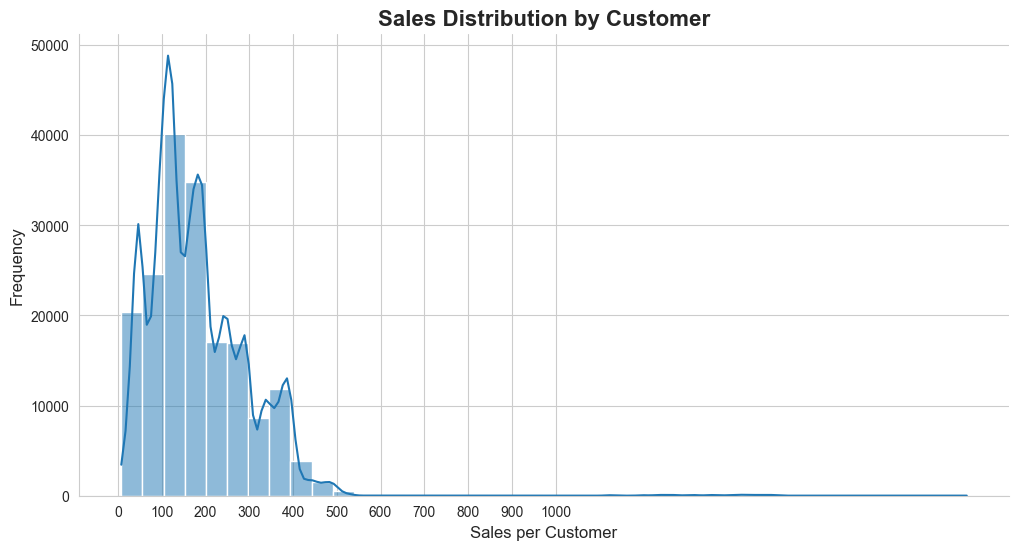

In [110]:
fig, ax = customized_plot('Sales Distribution by Customer', 'Sales per Customer', 'Frequency')
sns.histplot(supply_chain_data['Sales per customer'], bins=40, kde=True, ax=ax)
ax.set_xticks([0,100,200,300,400,500,600,700,800,900,1000])
plt.show()

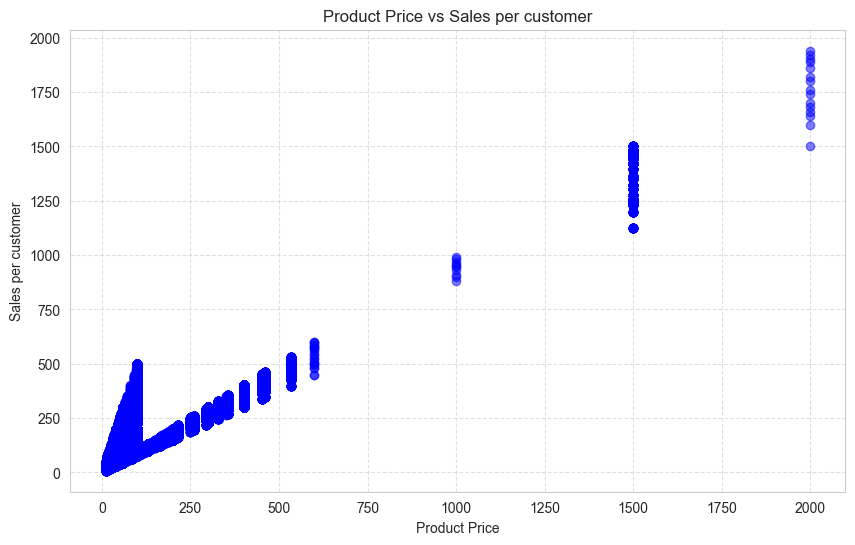

In [111]:
plt.figure(figsize=(10, 6))
plt.scatter(supply_chain_data['Product Price'], supply_chain_data['Sales per customer'], c='blue', alpha=0.5)
plt.title('Product Price vs Sales per customer')
plt.xlabel('Product Price')
plt.ylabel('Sales per customer')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

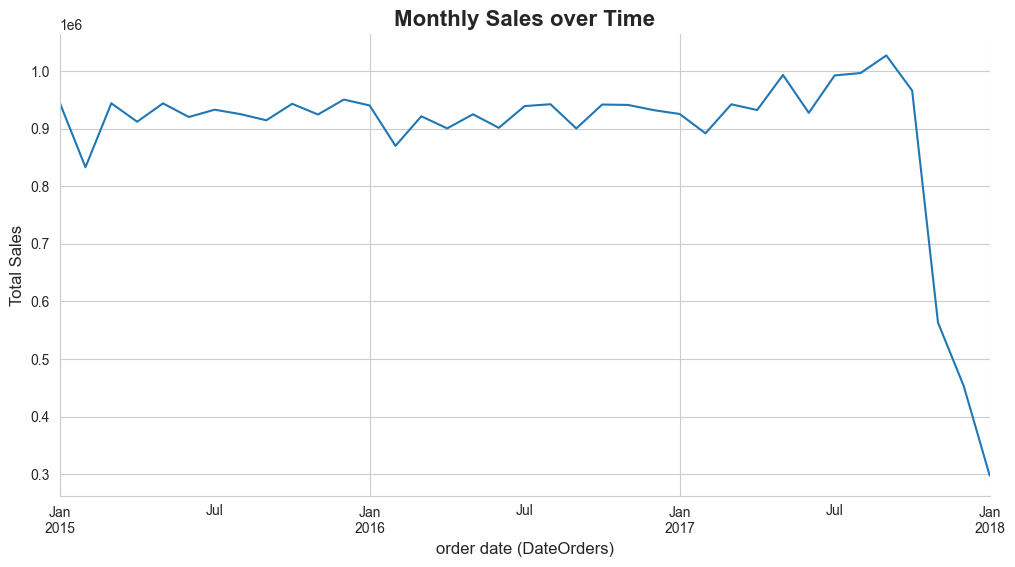

In [112]:
supply_chain_data['order date (DateOrders)'] = pd.to_datetime(supply_chain_data['order date (DateOrders)'])
supply_chain_data.set_index('order date (DateOrders)', inplace=True)
monthly_sales = supply_chain_data['Sales per customer'].resample('M').sum()
fig, ax = customized_plot('Monthly Sales over Time', 'Date', 'Total Sales')
monthly_sales.plot(ax=ax)
plt.show()

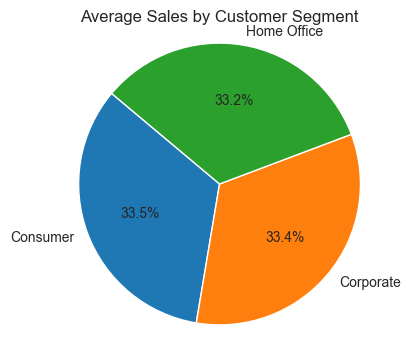

In [113]:
average_sales_by_segment = supply_chain_data.groupby('Customer Segment')['Sales per customer'].mean().reset_index()
plt.figure(figsize=(4, 4))
plt.pie(average_sales_by_segment['Sales per customer'], labels=average_sales_by_segment['Customer Segment'], autopct='%1.1f%%', startangle=140)
plt.title('Average Sales by Customer Segment')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

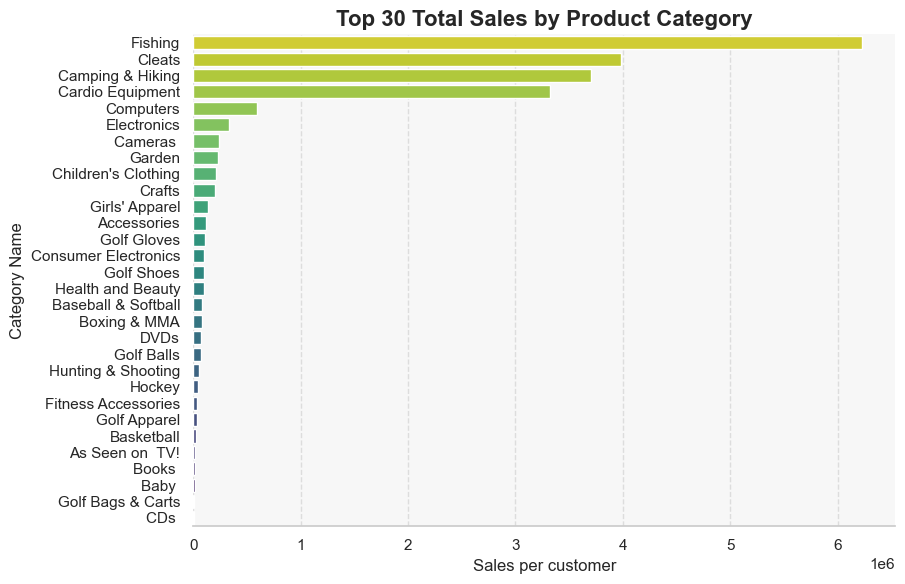

In [143]:
# Calculate total sales for each product category
total_sales_by_category = supply_chain_data.groupby('Category Name')['Sales per customer'].sum().reset_index()

# Sort the DataFrame by total sales in descending order
total_sales_by_category = total_sales_by_category.head(30).sort_values(by='Sales per customer', ascending=True)

sns.set_style("whitegrid")
fig, ax = customized_plot('Top 30 Total Sales by Product Category', 'Total Sales', 'Category Name')
sns.barplot(x='Sales per customer', y='Category Name', data=total_sales_by_category, ax=ax, palette='viridis')
ax.set_facecolor('#f7f7f7')  # Set background color
sns.despine(top=True, right=True, left=True)  # Remove spines
ax.xaxis.grid(True, linestyle='--', alpha=0.6)  # Add vertical grid lines
plt.tight_layout()  # Ensure labels are not cut off
ax.invert_yaxis()
plt.subplots_adjust(left=0.4)
plt.show()

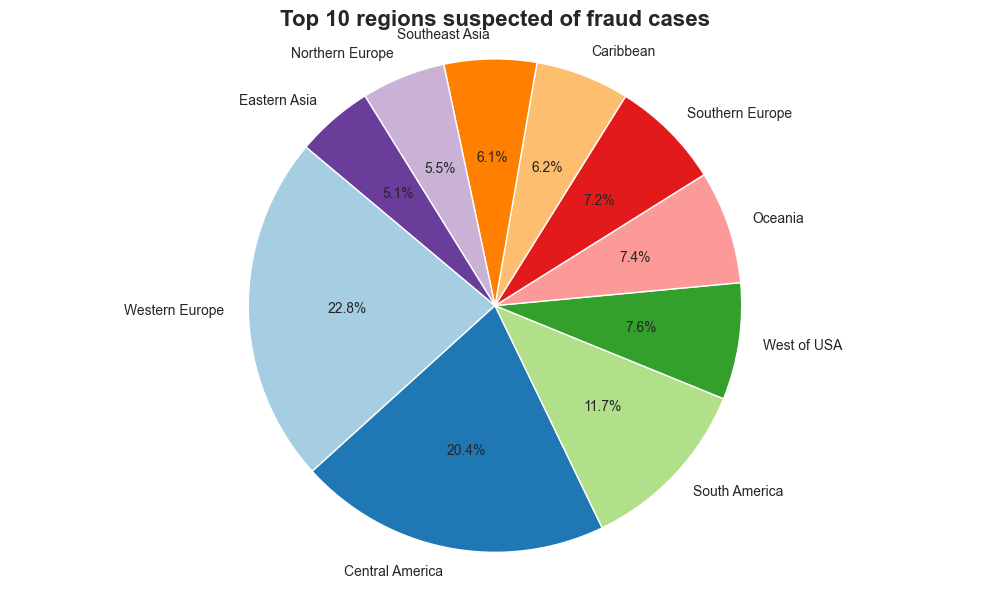

In [135]:
#  Filter the dataset to include suspected fraud orders
suspected_fraud_orders = supply_chain_data[supply_chain_data['Order Status'] == 'SUSPECTED_FRAUD']

# Group the data by Order Region to count suspected fraud cases
fraud_counts = suspected_fraud_orders['Order Region'].value_counts().head(10)

# Create a pie chart to visualize the distribution of suspected fraud cases by region
plt.figure(figsize=(10, 6))
plt.pie(fraud_counts, labels=fraud_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(fraud_counts))))

# Add title
plt.title('Top 10 regions suspected of fraud cases', fontsize=16, fontweight='bold')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.show()

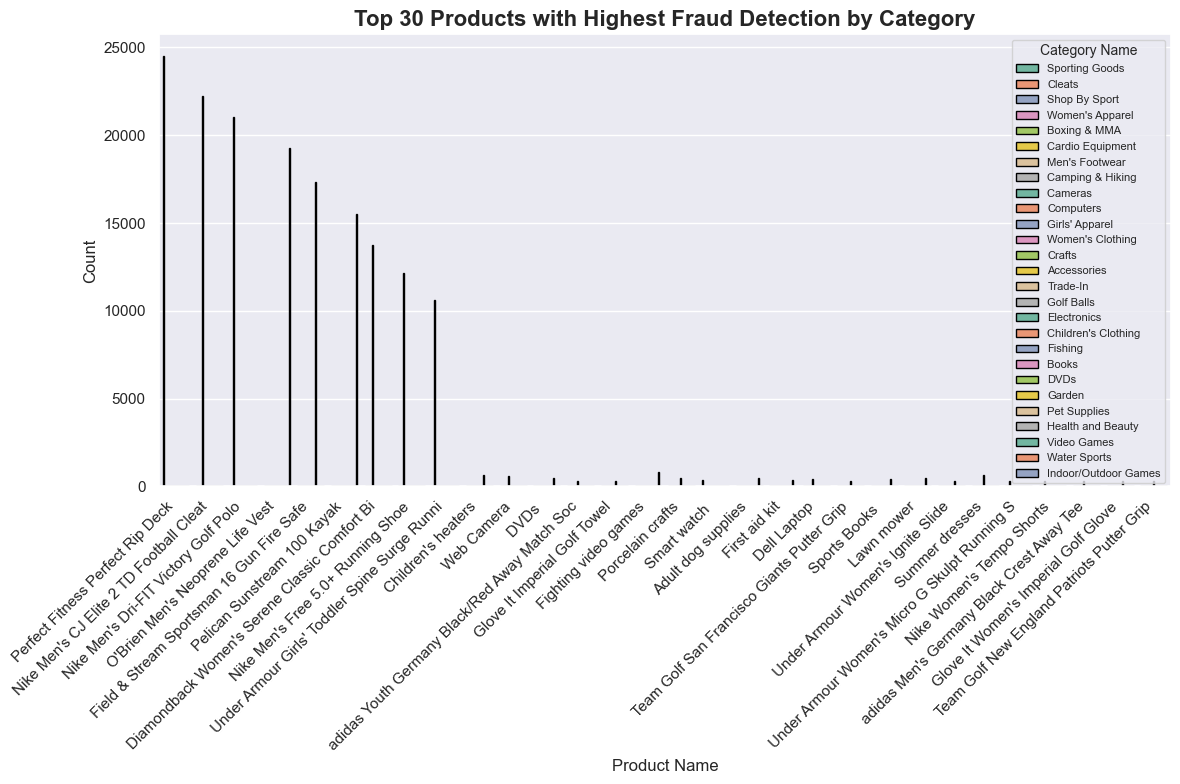

In [147]:

# Filter suspected fraud orders
suspected_fraud_orders = supply_chain_data[supply_chain_data['Order Status'] == 'SUSPECTED_FRAUD']

# Get the top 30 products with the highest fraud detection
top_30_fraud_products = suspected_fraud_orders['Product Name'].value_counts().head(30)

# Keep only the top 30 fraud products
top_30_fraud_product_data = supply_chain_data[supply_chain_data['Product Name'].isin(top_30_fraud_products.index)]

# Create the plot with black lines
plt.figure(figsize=(12, 8))
sns.set(style="darkgrid")

# Create a countplot for the top 30 fraud products by category
ax = sns.countplot(
    x='Product Name', 
    data=top_30_fraud_product_data, 
    hue='Category Name', 
    order=top_30_fraud_products.index,  # Order by frequency of occurrence
    palette='Set2',
    edgecolor='black',  # Set line color to black
)

# Customize plot labels and title
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Top 30 Products with Highest Fraud Detection by Category', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
ax.legend(title='Category Name', title_fontsize=10, fontsize=8, loc='upper right')
plt.tight_layout()
plt.show()


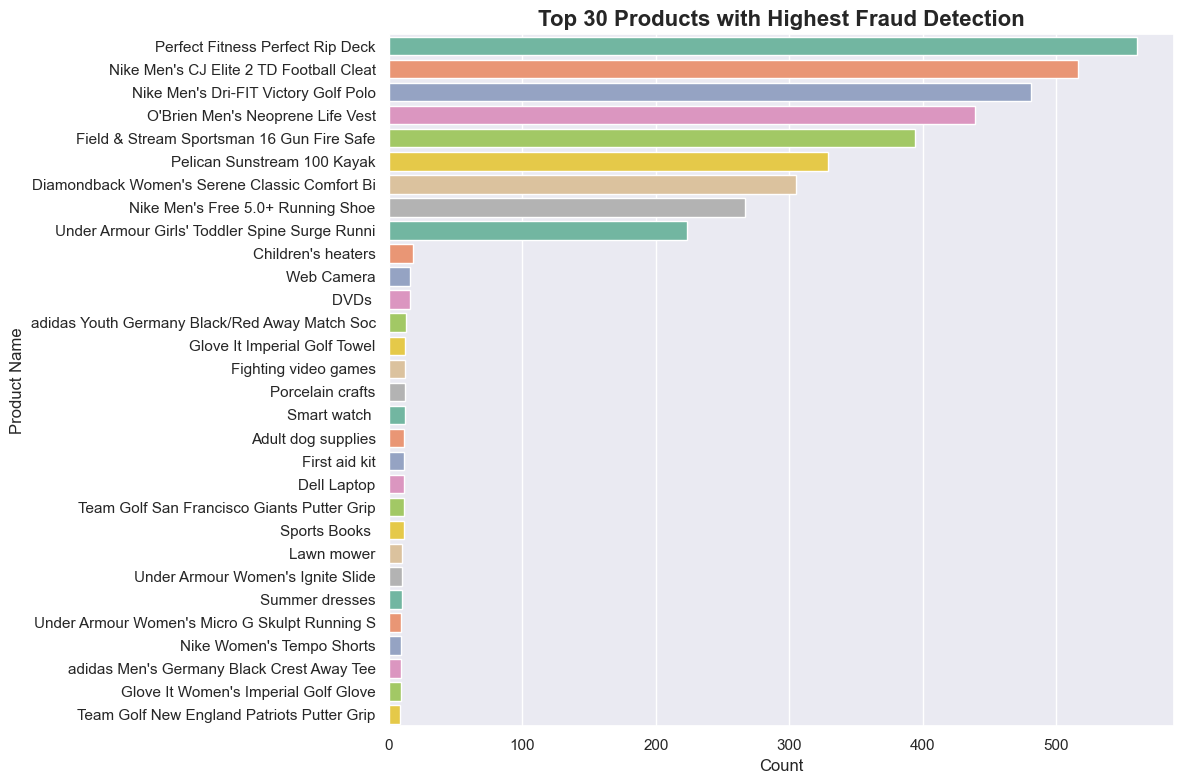

In [151]:
# Filter the dataset to include suspected fraud orders
suspected_fraud_orders = supply_chain_data[supply_chain_data['Order Status'] == 'SUSPECTED_FRAUD']

# Get the top 30 products with the highest fraud detection
top_30_fraud_products = suspected_fraud_orders['Product Name'].value_counts().head(30)

# Create a figure and axis for the horizontal bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=top_30_fraud_products.values, y=top_30_fraud_products.index, palette='Set2')

# Add labels and title
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Product Name', fontsize=12)
ax.set_title('Top 30 Products with Highest Fraud Detection', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

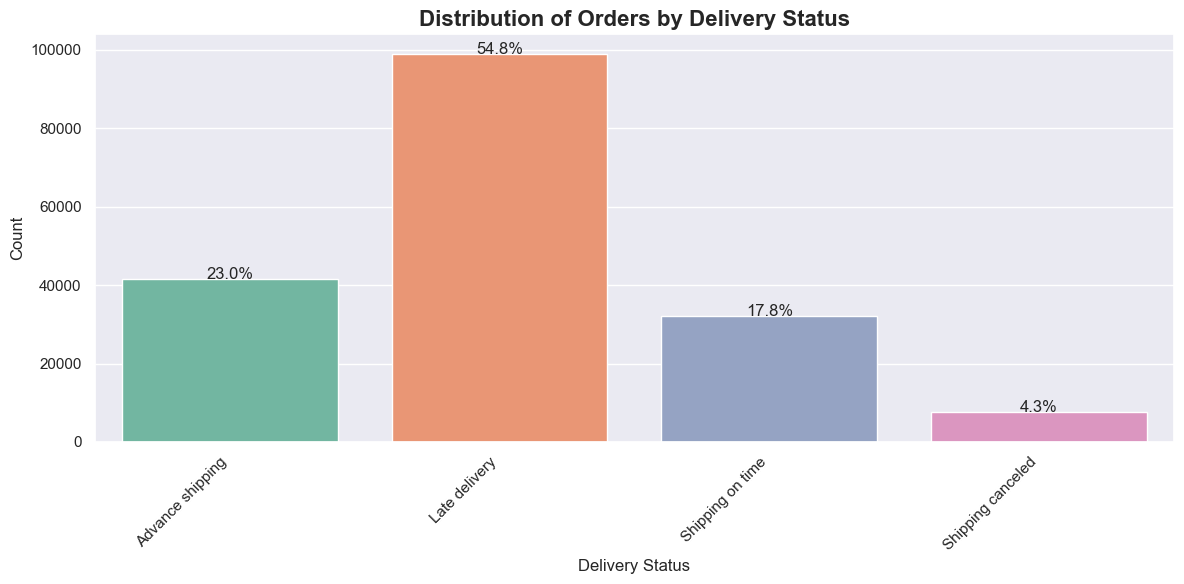

In [142]:
# Create plot and calculate the percentages
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Delivery Status', data=supply_chain_data, palette='Set2')
plt.xlabel('Delivery Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Orders by Delivery Status', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
# Calculate and display percentages
total_orders = len(supply_chain_data)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_orders)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 10 
    ax.annotate(percentage, (x, y), ha='center')
plt.tight_layout()
plt.show()

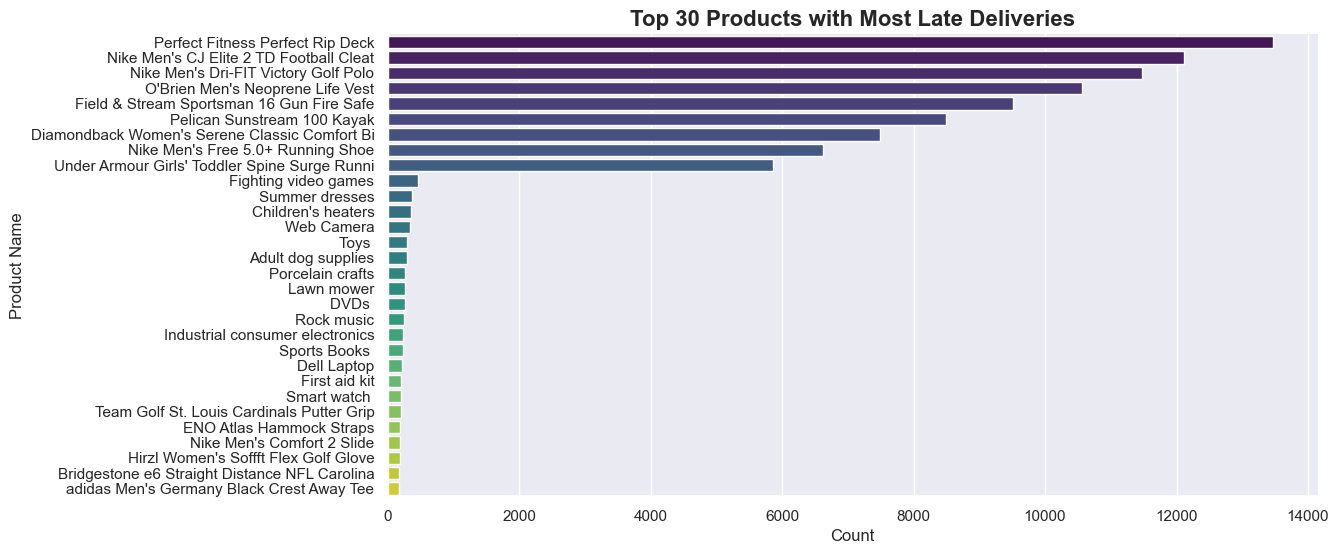

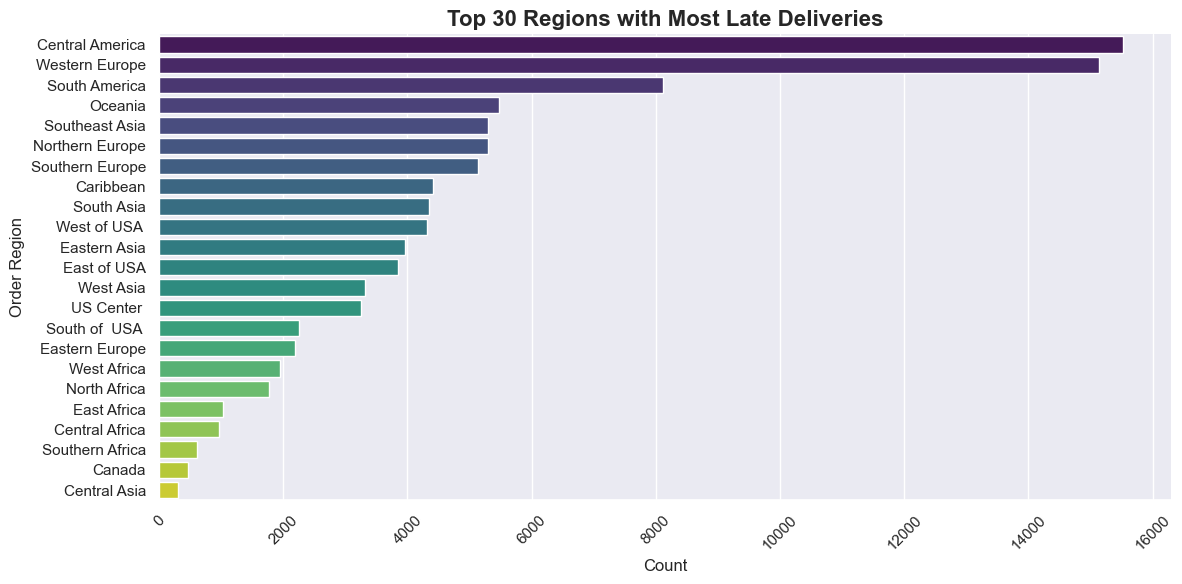

In [150]:
# Filter late deliveries (Late_delivery_risk = 1)
late_deliveries = supply_chain_data[supply_chain_data['Late_delivery_risk'] == 1]

# Get the top 30 products with the most late deliveries
top_30_late_products = late_deliveries['Product Name'].value_counts().head(30)

# Get the top 30 regions with the most late deliveries
top_30_late_regions = late_deliveries['Order Region'].value_counts().head(30)

# Bar plot for top 30 products with most late deliveries
fig, ax = customized_plot('Top 30 Products with Most Late Deliveries', 'Count', 'Product Name', x_rotation=0)
sns.barplot(x=top_10_late_products.values, y=top_10_late_products.index, ax=ax, palette='viridis')

# Bar plot for top 30 regions with most late deliveries
fig, ax = customized_plot('Top 30 Regions with Most Late Deliveries', 'Count', 'Order Region', x_rotation=45)
sns.barplot(x=top_10_late_regions.values, y=top_10_late_regions.index, ax=ax, palette='viridis')

plt.tight_layout()
plt.show()

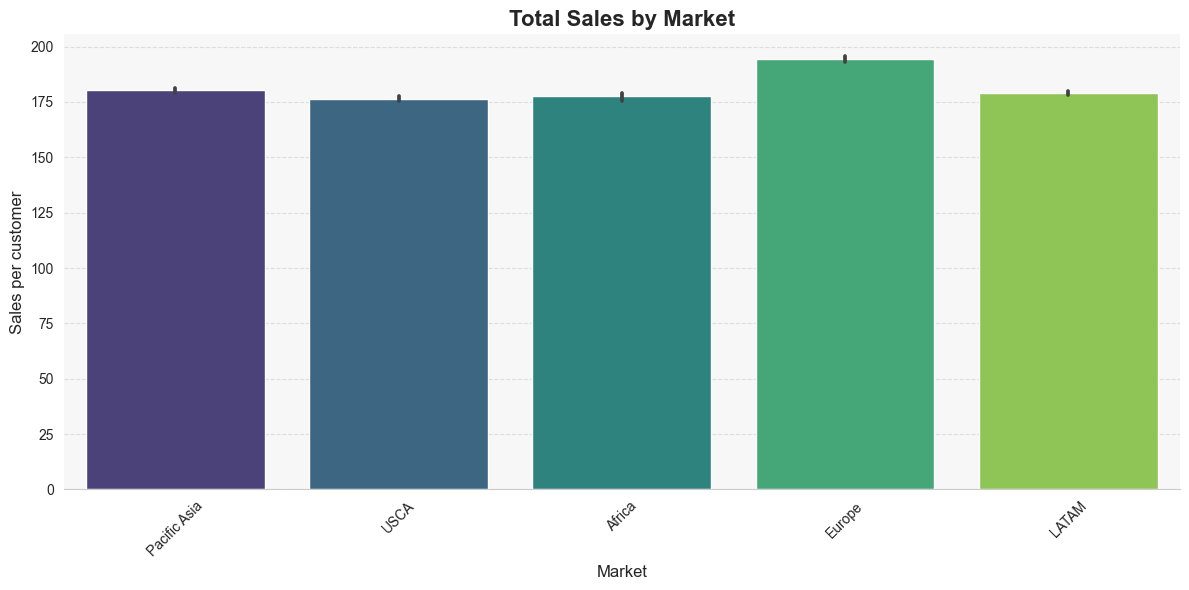

In [117]:
fig, ax = customized_plot('Total Sales by Market', 'Market', 'Total Sales')
sns.barplot(x='Market', y='Sales per customer', data=supply_chain_data, ax=ax, palette='viridis')
ax.set_facecolor('#f7f7f7')  
sns.despine(top=True, right=True, left=True)  
ax.yaxis.grid(True, linestyle='--', alpha=0.6) 
plt.xticks(rotation=45)
plt.tight_layout()  # ensure labels are not cut off
plt.show()

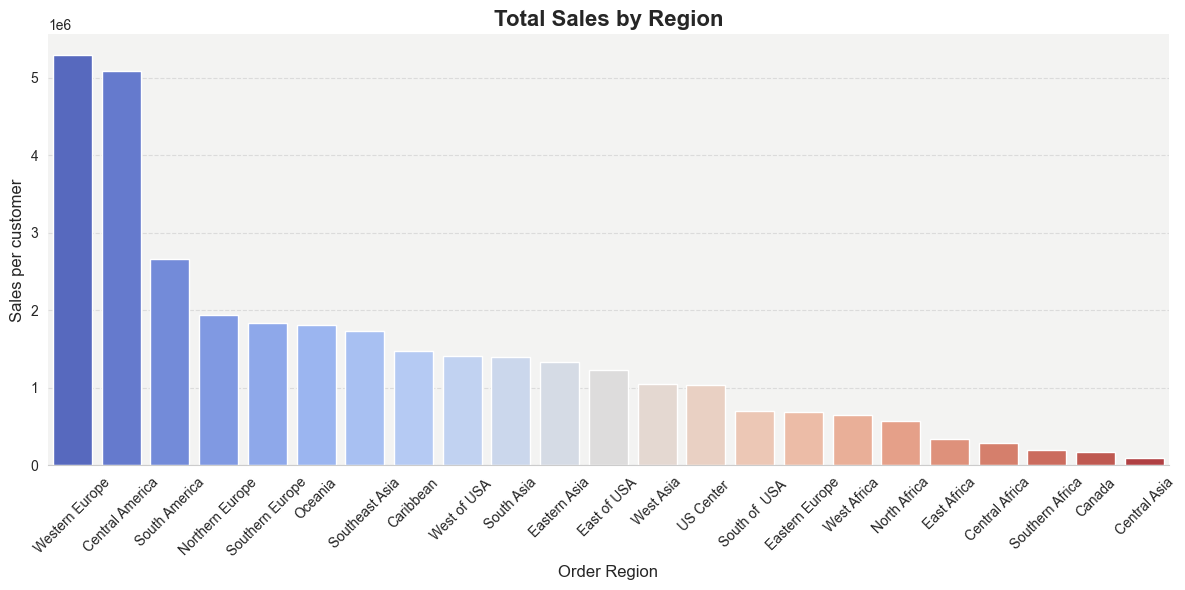

In [118]:
total_sales_by_region = supply_chain_data.groupby('Order Region')['Sales per customer'].sum().reset_index()

sales_by_region_sorted = total_sales_by_region.sort_values(by='Sales per customer', ascending=False)
fig, ax = customized_plot('Total Sales by Region', 'Order Region', 'Total Sales')
sns.barplot(x='Order Region', y='Sales per customer', data=sales_by_region_sorted, ax=ax, palette='coolwarm')
ax.set_facecolor('#f3f3f2')  
sns.despine(top=True, right=True, left=True)  
ax.yaxis.grid(True, linestyle='--', alpha=0.6) 
plt.xticks(rotation=45)
plt.tight_layout()  # ensure labels are not cut off
plt.show()

# Findings:

*  The distribution of sales by customer is right skewed. Most of the sale value are centered around 100-150 units. This field represents the total sales generated by each individual customer. <br /> <br />

* Prices have a linear relationship with sales. There have been fluctuations over the years, but sales suddenly started to dip at the beginning of 2018. <br /> <br />

* The 'Consumer' category slightly dominates as the largest segment, while the 'Corporate' and 'Home Office' segments are nearly equal in size. <br /> <br />

* The top selling product categories are fishing, cleats followed by camping & hiking. On the contrary, the top categories with the highest fraud detection were sporting goods followed by cleats and shop by sport. The top products with the highest fraud detection however, seem to be the ‘Perfect Fitness Perfect Rip Deck’, the ‘Nike Men’s CJ Elite 2 TD football Cleat’ and the ‘Nike Men’s Dry-FIT Victory Golf Polo’. Surprisingly, almost half of the total fraudulent cases happened in Western Europe (almost 22.8%) and Central America (20.4%).  <br /> <br />

* By a substantial degree, most of the deliveries were delivered late to the customers. Specifically, more than half of the total orders were considered to be delivered late. Most, if not all, of the top selling products were delivered late. The most late deliveries happened in Central America and then in Western Europe. <br /> <br />

* The biggest selling market is found to be Europe and then Pacific Asia along with Latin America (LATAM). Region-wise, the throne belongs to Western Europe closely followed by Central America. Central Asia has the lowest sales per region. This is very interesting in conjunction to the point above. <br /> <br />